In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys

sys.path.append(str(b3d.get_root_path()))

In [3]:
from tests.sama4d.video_to_tracks.video_to_tracks_task import VideoToTracksTask
from tests.sama4d.video_to_tracks.solvers.conv_with_reinstantiation import PatchTracker2DSolver
import genjax
import rerun

genjax.pretty()

In [4]:
solver = PatchTracker2DSolver(
        patch_size=11,
        num_tracks=80,
        frames_before_adding_to_active_set=7,
        reinitialize_patches=True,
        culling_error_threshold=60,
        culling_error_ratio_threshold=0.8,
        mindist_for_second_error=4,
        maxdist_for_second_error=40
    )

In [7]:
import os
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d--%H:%M")
folder_name = b3d.get_assets_path() / "test_results" / f"patch_tracking_{current_time}"
os.mkdir(folder_name)

Processing pan_around_blocks.npz...
	Solved.  Generating visualization...
	Visualization saved at /home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-19--22:18/pan_around_blocks__from_2D_tracker.mp4.  Generating FeatureTrackData...
	FeatureTrackData saved at /home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-19--22:18/pan_around_blocks__from_2D_tracker.FeatureTrackData.npz.
Processing pan_around_frog.npz...
	Solved.  Generating visualization...
	Visualization saved at /home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-19--22:18/pan_around_frog__from_2D_tracker.mp4.  Generating FeatureTrackData...
	FeatureTrackData saved at /home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-19--22:18/pan_around_frog__from_2D_tracker.FeatureTrackData.npz.
Processing pan_around_rocket.npz...
	Solved.  Generating visualization...
	Visualization saved at /home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-19--22:18/pan_around_rock

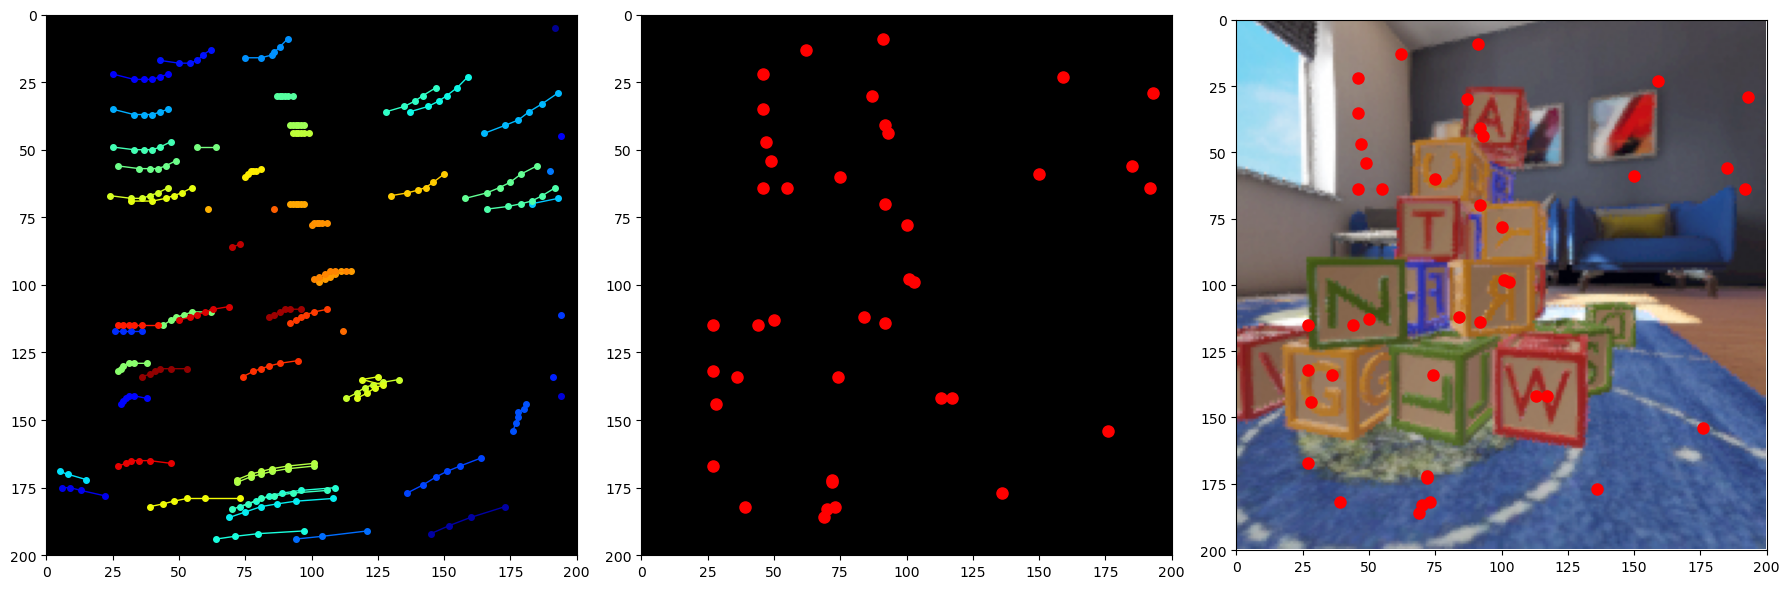

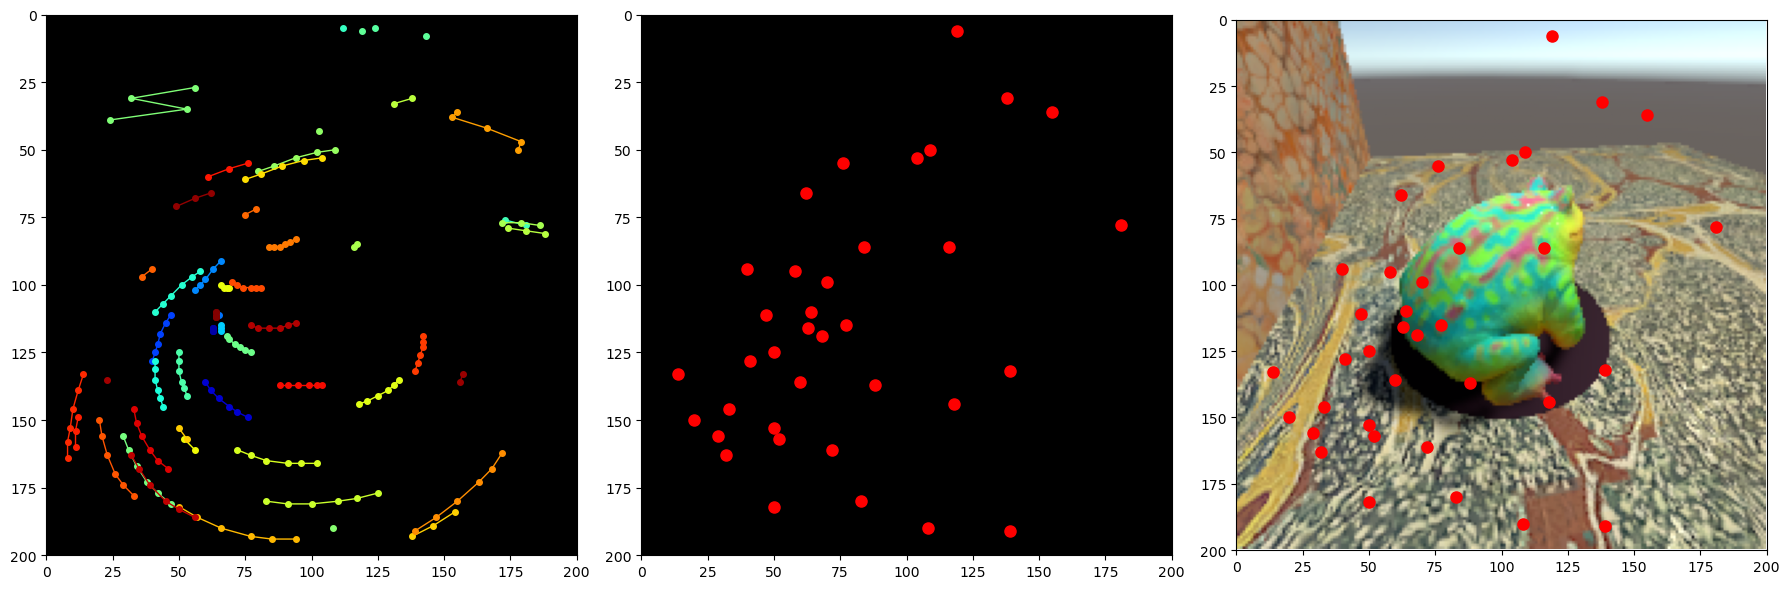

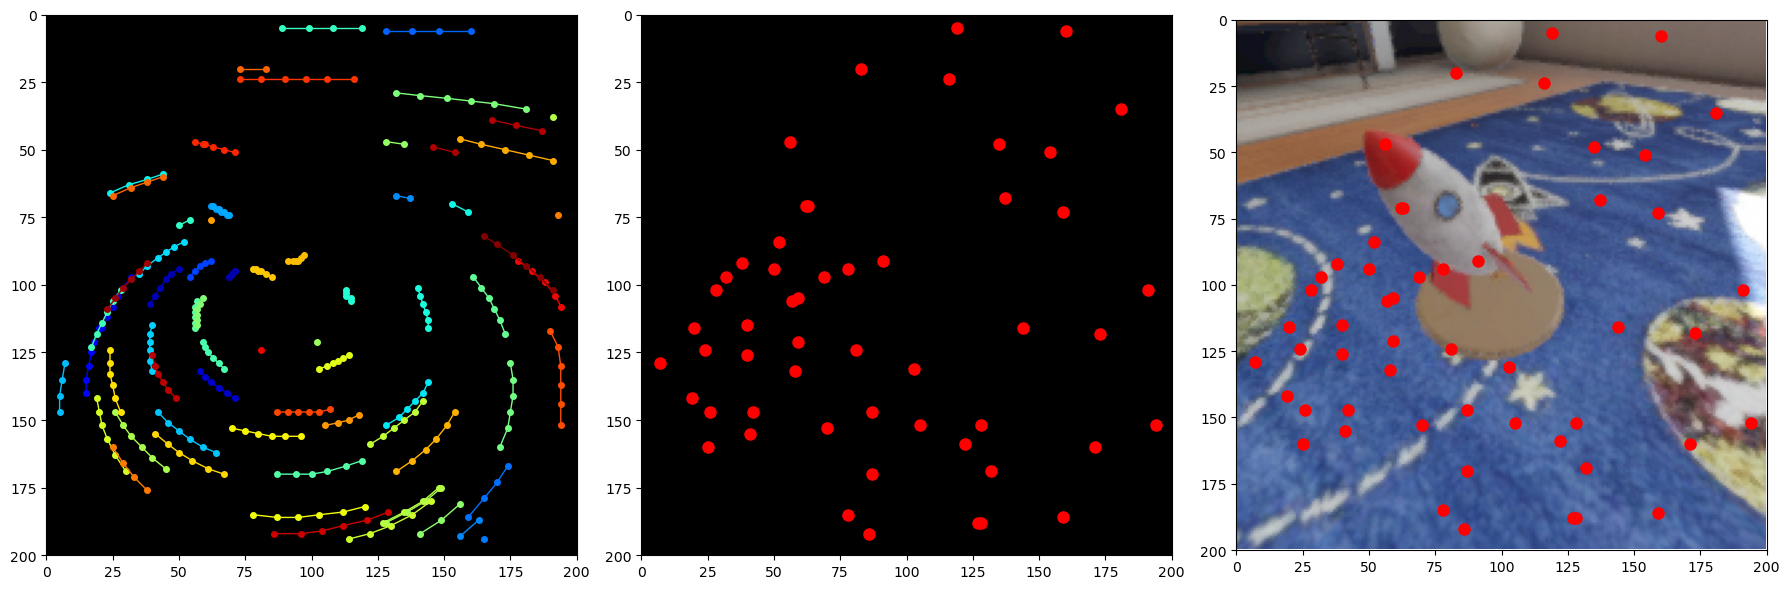

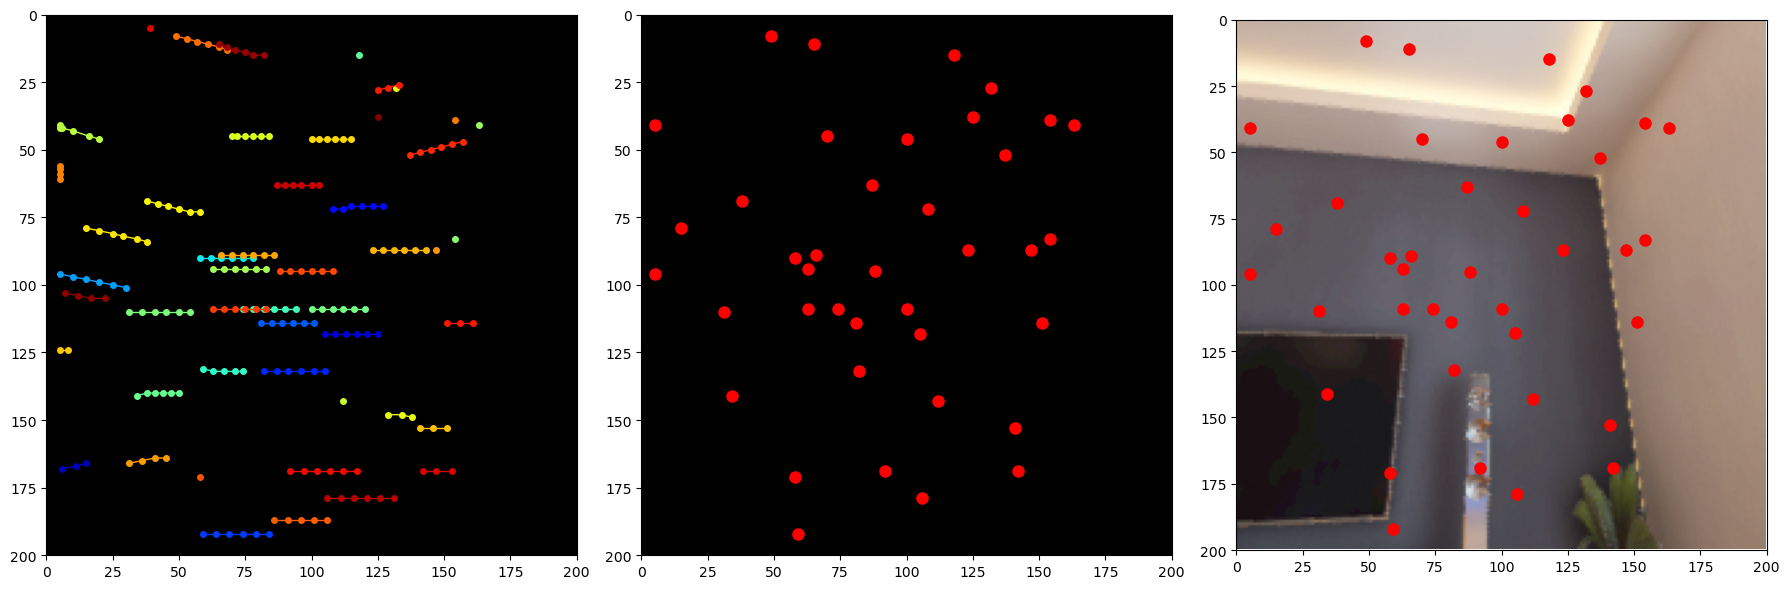

In [8]:
for filename in [
    "pan_around_blocks.npz",
    "pan_around_frog.npz",
    "pan_around_rocket.npz",
    "pan_through_plantroom.npz",
]:
    print(f"Processing {filename}...")
    load_path = b3d.get_assets_path() / 'shared_data_bucket/dynamic_SfM/feature_track_data' / filename
    ftd_og = b3d.io.FeatureTrackData.load(str(load_path)).slice_time(0, 20)

    task = VideoToTracksTask.from_feature_track_data(ftd_og, has_no_moving_objects=True)
    print("\tData loaded and task created.  Solving...")
    solution = solver.solve(task.get_task_specification())
    print("\tSolved.  Generating visualization...")

    first_part_of_filename = filename.split(".")[0]
    viz_save_path = folder_name / f"{first_part_of_filename}__from_2D_tracker.mp4"
    feature_track_data_save_path = folder_name / f"{first_part_of_filename}__from_2D_tracker.FeatureTrackData.npz"
    task.matplotlib_visualization(solution, save_at=viz_save_path)
    print(f"\tVisualization saved at {viz_save_path}.  Generating FeatureTrackData...")
    task.get_feature_track_data_from_solution(solution).save(str(feature_track_data_save_path))
    print(f"\tFeatureTrackData saved at {feature_track_data_save_path}.")